In [173]:
import pandas as pd
import numpy as np
import matplotlib as plt 
%matplotlib inline
import statsmodels as sm
import statsmodels.regression.linear_model as sm1

In [174]:
data = pd.read_csv('data/house_data.csv')
data.head()

,house_price,sqrt_foor,city
0,9,25,latur
1,8,9,Mumbai
2,9,8,pune
3,9,25,latur
4,8,9,Mumbai


In [175]:
obj = data.dtypes==np.object
obj

house_price    False
sqrt_foor      False
city            True
dtype: bool

In [176]:
dummydf = pd.DataFrame()

In [177]:
for i in data.columns[obj]:
    dummy = pd.get_dummies(data[i],drop_first=True)
    dummydf = pd.concat([dummydf,dummy], axis = 1)

In [178]:
for i in data.columns[obj]:
    d = pd.get_dummies(data[i],drop_first=True)
    #df = pd.concat([dummydf,dummy], axis = 1)

In [179]:
d.head()

,Mumbai,latur,pune,udgir
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [180]:
dummydf.head()

,Mumbai,latur,pune,udgir
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [181]:
dummy.head()

,Mumbai,latur,pune,udgir
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,1,0,0,0


In [182]:
data2 =pd.concat([data,dummy], axis = 1)

In [183]:
data2.head()

,house_price,sqrt_foor,city,Mumbai,latur,pune,udgir
0,9,25,latur,0,1,0,0
1,8,9,Mumbai,1,0,0,0
2,9,8,pune,0,0,1,0
3,9,25,latur,0,1,0,0
4,8,9,Mumbai,1,0,0,0


In [184]:
del data2['city']

In [185]:
data2.head()

,house_price,sqrt_foor,Mumbai,latur,pune,udgir
0,9,25,0,1,0,0
1,8,9,1,0,0,0
2,9,8,0,0,1,0
3,9,25,0,1,0,0
4,8,9,1,0,0,0


In [186]:
data2.shape

(32, 6)

In [187]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
house_price    32 non-null int64
sqrt_foor      32 non-null int64
Mumbai         32 non-null uint8
latur          32 non-null uint8
pune           32 non-null uint8
udgir          32 non-null uint8
dtypes: int64(2), uint8(4)
memory usage: 720.0 bytes


In [188]:
data2.describe()

,house_price,sqrt_foor,Mumbai,latur,pune,udgir
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,8.687500,13.625000,0.312500,0.250000,0.312500,0.062500
std,0.470929,7.803018,0.470929,0.439941,0.470929,0.245935
min,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,25.000000,1.000000,0.250000,1.000000,0.000000
max,9.000000,25.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
data2.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
house_price,9,8,9,9,8,9,9,8,9,9,...,9,8,9,9,8,9,9,9,8,9
sqrt_foor,25,9,8,25,9,8,25,9,8,25,...,25,9,8,25,9,8,8,25,9,8
Mumbai,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
latur,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
pune,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
udgir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [190]:
data2.head()

,house_price,sqrt_foor,Mumbai,latur,pune,udgir
0,9,25,0,1,0,0
1,8,9,1,0,0,0
2,9,8,0,0,1,0
3,9,25,0,1,0,0
4,8,9,1,0,0,0


In [191]:
dep = 'house_price'
x = data2.drop(dep, axis=1)
y = data2[dep]

In [192]:
import seaborn as sbn
# scatter plot

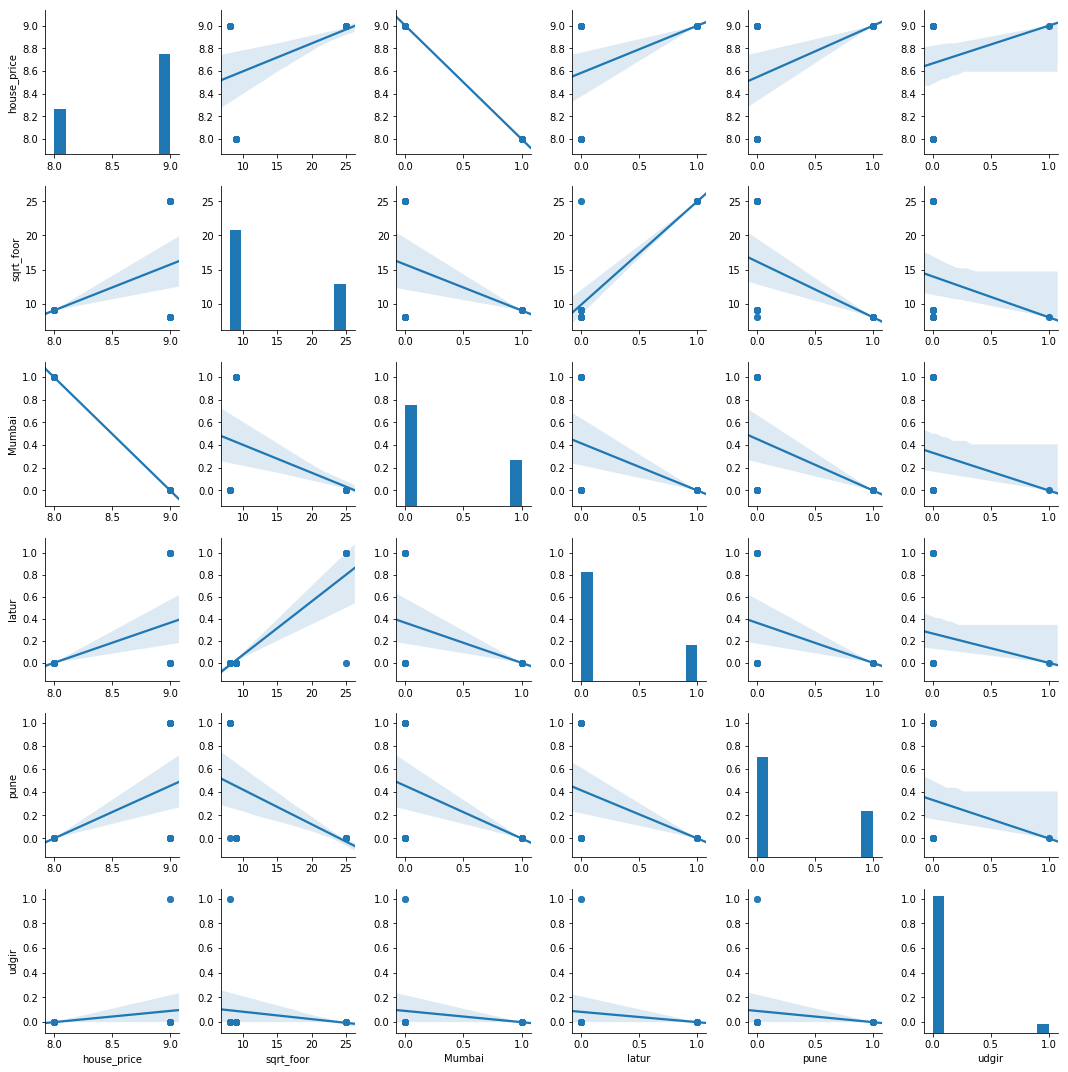

In [193]:
sbn.pairplot(data2, kind = 'reg')

In [194]:
import sklearn.cross_validation as vld

In [195]:
# split train and test data
x_train, x_test, y_train, y_test = vld.train_test_split(x,y,test_size=0.20)

In [196]:
#x_train.shape
#x_test.shape

In [197]:
lm = sm1.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.545e+24
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          1.38e-234
Time:                        10:37:31   Log-Likelihood:                 659.69
No. Observations:                  25   AIC:                            -1309.
Df Residuals:                      20   BIC:                            -1303.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sqrt_foor      0.3600   2.65e-14   1.36e+13      0.000       0.360       0.360
Mumbai         4.7600   4.09e-13   1.16e+13      0.000       4.760       4.760
latur      -6.217e-15   7.85e-13     -0.008      0.994   -1.64e-12    1.63e-12
pune           6.1200   3.94e-13   1.55e+13      0.000       6.120       6.120
udgir          6.1200   6.96e-13   8.79e+12      0.000       6.120       6.120
==============================================================================
Omnibus:                        6.871   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.051
Skew:                          -0.969   Prob(JB):                       0.0800
Kurtosis:                       1.955   Cond. No.                         71.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
pred_train = lm.predict(x_train)
pred_train

26    8.0
24    9.0
19    9.0
27    9.0
7     8.0
11    9.0
18    9.0
22    9.0
14    8.0
20    8.0
4     8.0
15    9.0
13    9.0
31    9.0
9     9.0
16    9.0
1     8.0
10    8.0
2     9.0
6     9.0
21    9.0
12    9.0
17    8.0
5     9.0
29    9.0
dtype: float64

In [200]:
err_train = pred_train - y_train
err_train

26    5.027090e-13
24    4.440892e-13
19    1.389111e-12
27    4.440892e-13
7     5.027090e-13
11    4.440892e-13
18    4.440892e-13
22    1.389111e-12
14    5.027090e-13
20    5.027090e-13
4     5.027090e-13
15    4.760636e-13
13    1.396216e-12
31    4.760636e-13
9     1.389111e-12
16    1.389111e-12
1     5.027090e-13
10    5.027090e-13
2     4.440892e-13
6     1.389111e-12
21    4.440892e-13
12    4.440892e-13
17    5.027090e-13
5     4.440892e-13
29    1.396216e-12
dtype: float64

In [201]:
# predict
pred_test = lm.predict(x_test)
pred_test

3     9.0
28    9.0
0     9.0
8     9.0
23    8.0
30    8.0
25    9.0
dtype: float64

In [202]:
err_test = pred_test - y_test
err_test

3     1.389111e-12
28    4.440892e-13
0     1.389111e-12
8     4.440892e-13
23    5.027090e-13
30    5.027090e-13
25    1.389111e-12
dtype: float64

In [208]:
pred_train = lm.predict(x_train)
err_train = pred_train - y_train
# predict
pred_test = lm.predict(x_test)
err_test = pred_test - y_test